Dimensionality Reduction, Feature Extraction, and Manifold Learning
===

*principal component analysis* - rotates the dataset in a way such that the rotated features are statistically uncorrelated, and then selects a subset of the new features according to how important the features are
*non-negative matrix factorization (NMF)* - 
*t-SNE* - 

Principal Component Analysis
---

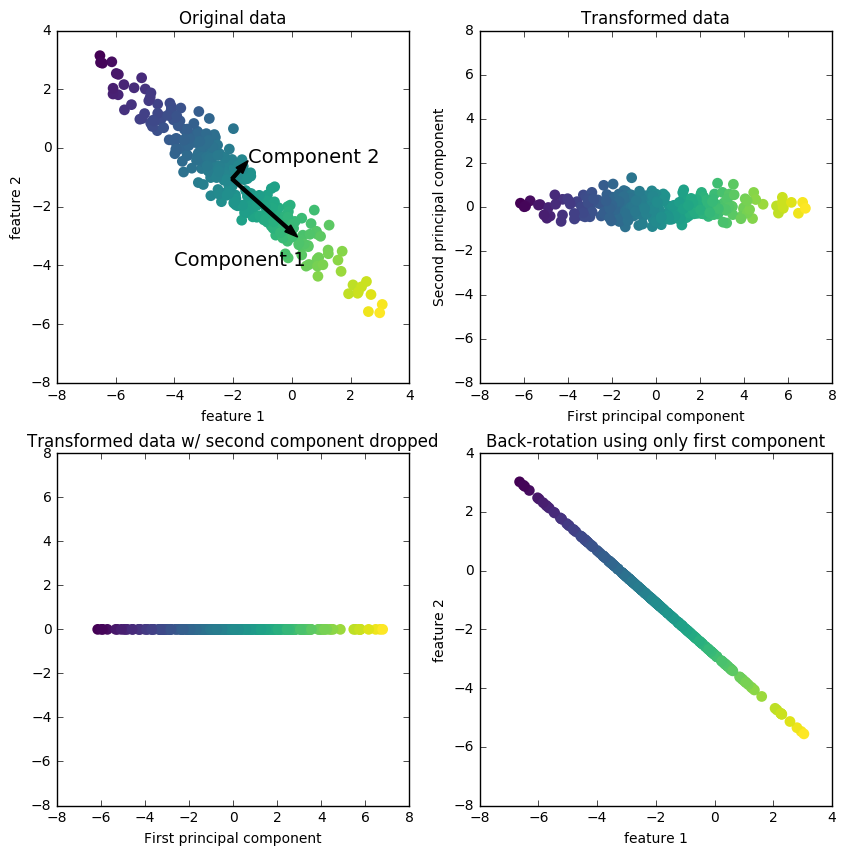

In [3]:
%matplotlib inline
import mglearn

mglearn.plots.plot_pca_illustration()

0. The first plot shows the original data.  
1. The algorithm procedes by finding the direction of maximum variance, labelled "component 1".  This is the vector in the data that contains the most information (the direction along which the features are most correlated with each other).  
2. Then, the algorithm finds the direction that contains the most information while being orthogonal.  There are as many principal components (vectors) as there are original features.
3. The data is then rotated to align with the x and y axis and the mean is subtracted from the data, so that the transformed data centers around 0.

From this PCA, we can keep only the first principal component, as shown in the third plot.  Or the rotation can be undone by adding the mean back to the data, Fig 4, keeping only the first principal component.  This procedure can help to reduce noise.

PCA can be used to help visualize high-dimensional datasets by computing histograms of each of the features. In applying PCA to the cancer dataset, we can visualize these histograms for the two classes, benign and malignant.

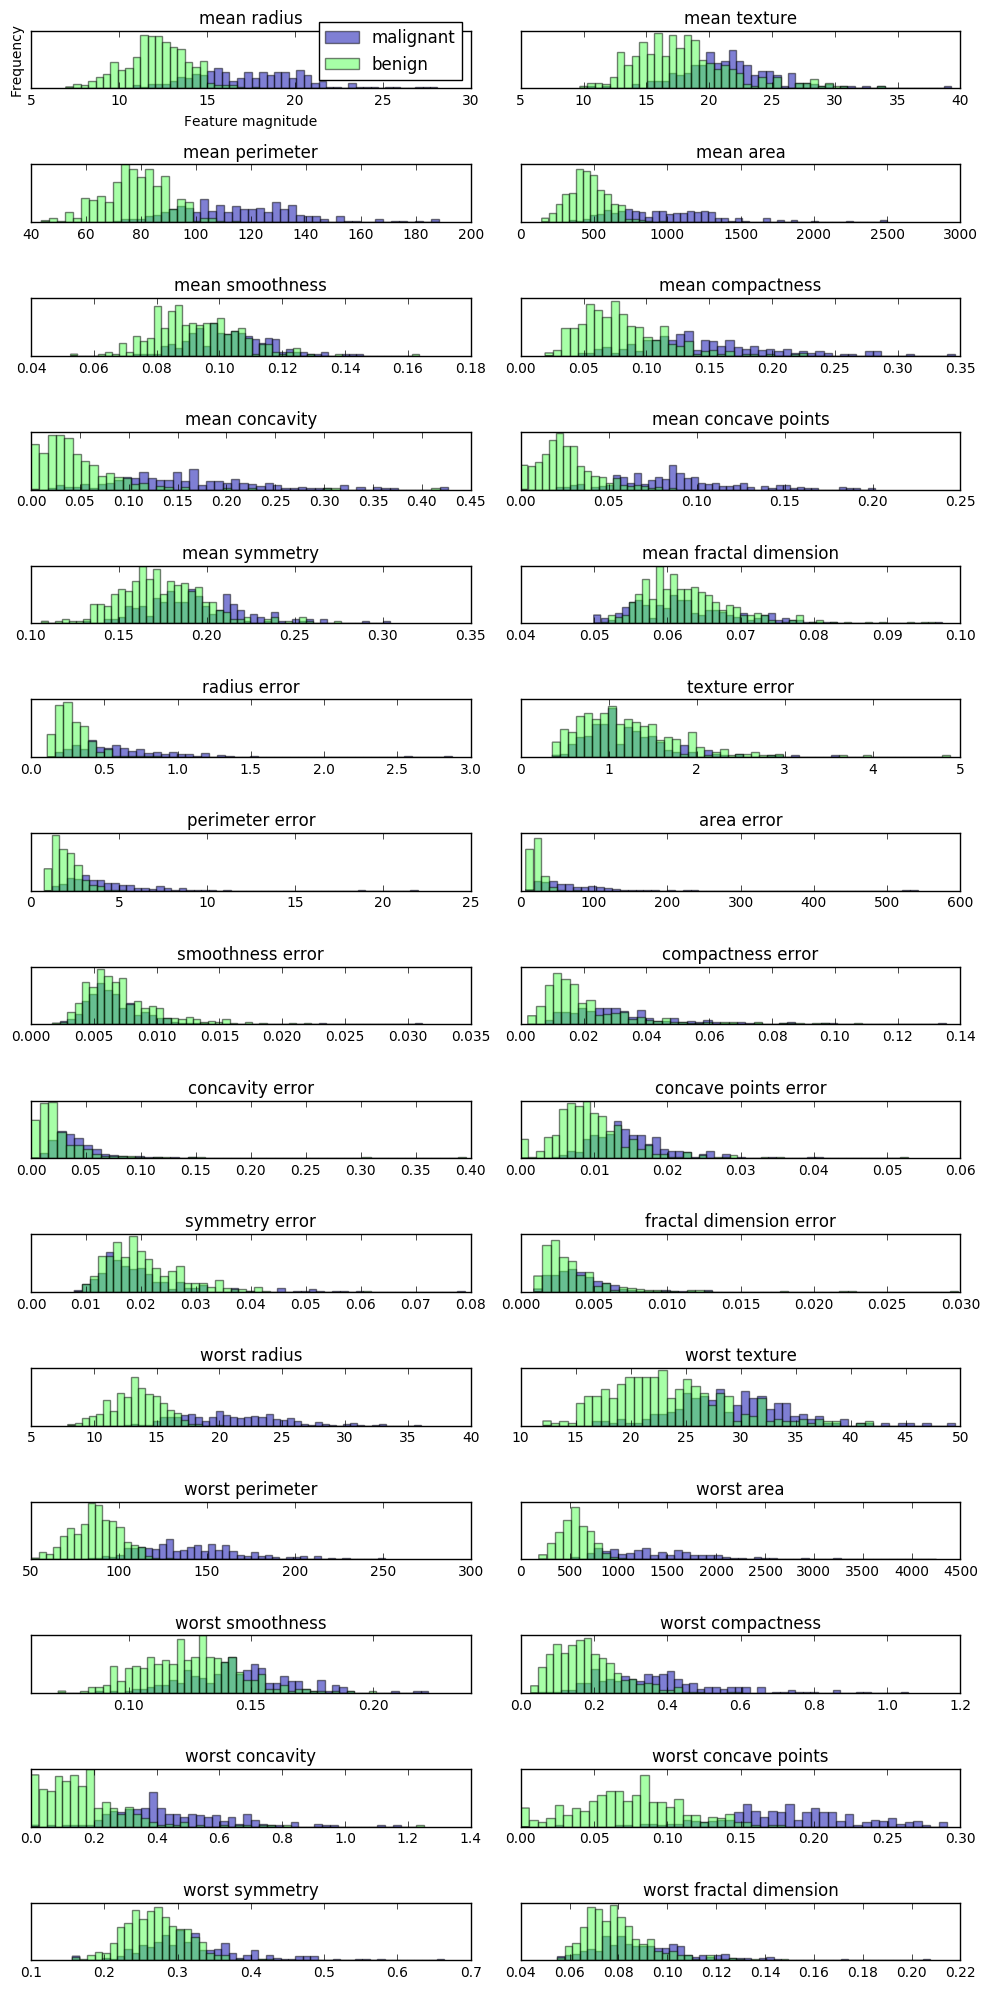

In [12]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

Disjoint histograms, like "worst concave points", are quite informative, while overlapping histograms, like "smoothness error", are not very informative.

These plots don't show us anything about the interactions between variables however.  Using PCA, we can find the first two principal components and visualize them in a two dimensional scatter plot.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)